In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here two columns Age and Cabin have nan values and since the record of data is made after the accident happen since many people died so we cant find their age and so the cabin therefore it doesn't fall under (MCAR) Missing Completely At Random type of missing value.

But the embark column is completely not related with any of the column embark means the station of drop or start

In [4]:
#missing completely at random exapmle
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


missing data not at random - when there is reln between data missing and any other value

In [5]:
import numpy as np
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)
df.head()
#new column created called 'Cabin_null'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [6]:
#now to check who have survived we can group it by cabin_null since survived will have cabin_null value 0 

In [7]:
df.groupby(['Survived'])['Cabin_null'].sum()

Survived
0    481
1    206
Name: Cabin_null, dtype: int32

# 1. Mean median mode imputation

In [8]:
df=pd.read_csv('train.csv',usecols=['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [10]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [11]:
median=df.Age.median()
median

28.0

In [12]:
impute_nan(df,'Age',median)
df.head()
#new column which fills nan value with median

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Density'>

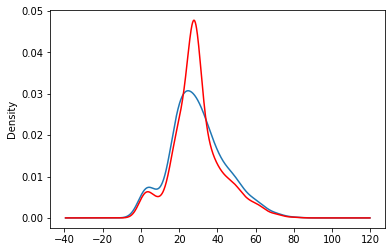

In [14]:
fig = plt.figure() 
df.Age.plot(kind='kde') 
df.Age_median.plot(kind='kde', color='red') 

In [15]:
# disadvantage is there is difference in variance and affects the correlation

# 2. Random sample imputation

In [16]:
df=pd.read_csv('train.csv',usecols=['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [18]:
df['Age'].isnull().sum()

177

In [19]:
df['Age'].dropna().sample(df['Age'].isnull().sum())

437    24.0
157    30.0
642     2.0
13     39.0
875    15.0
       ... 
225    22.0
729    25.0
583    36.0
747    30.0
52     49.0
Name: Age, Length: 177, dtype: float64

In [20]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
#we copy the variable in variable_random
    df[variable+'_random']=df[variable]
#now we get the values for nan values which is stored in random_sample
    random_sample=df[variable].dropna().sample(df['Age'].isnull().sum(),random_state=0)
#now we need index to merge the value with variable_random 
    random_sample.index=df[df[variable].isnull()].index
#we will replace the variable_random nan values with random_sample
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [21]:
median=df['Age'].median()
median

28.0

In [22]:
impute_nan(df,'Age',median)

In [23]:
df[df['Age'].isnull()]

,Survived,Age,Fare,Age_median,Age_random
5,0,NaN,8.4583,28.0,28.00
17,1,NaN,13.0000,28.0,50.00
19,1,NaN,7.2250,28.0,0.92
26,0,NaN,7.2250,28.0,36.00
28,1,NaN,7.8792,28.0,26.00
...,...,...,...,...,...
859,0,NaN,7.2292,28.0,22.00
863,0,NaN,69.5500,28.0,25.00
868,0,NaN,9.5000,28.0,15.00
878,0,NaN,7.8958,28.0,34.00


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Density'>

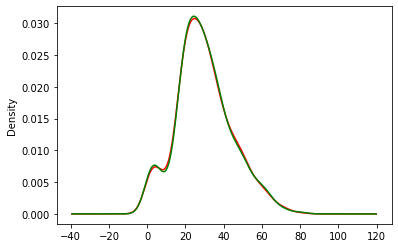

In [25]:
fig=plt.figure()
df.Age.plot(kind='kde',color='red')
df.Age_random.plot(kind='kde',color='green')

Here we can see the graph is almost same i.e the previous median imputation was creating the change in variance and affecting the correlation therefore we overcome the disadvantages to median imputation

In [26]:
#disadvantage in every situation randomness doesnt work

# Capturing nan value with with a new feature

In [27]:
# it works well when data are not missing completely

In [28]:
df=pd.read_csv('train.csv',usecols=['Age','Cabin','Fare'])
df.head()

,Age,Fare,Cabin
0,22.0,7.2500,NaN
1,38.0,71.2833,C85
2,26.0,7.9250,NaN
3,35.0,53.1000,C123
4,35.0,8.0500,NaN


In [29]:
df['Age_nan']=np.where(df['Age'].isnull(),1,0)
df.head()

,Age,Fare,Cabin,Age_nan
0,22.0,7.2500,NaN,0
1,38.0,71.2833,C85,0
2,26.0,7.9250,NaN,0
3,35.0,53.1000,C123,0
4,35.0,8.0500,NaN,0


# End of distribution imputation

In [30]:
df=pd.read_csv('train.csv',usecols=['Age','Cabin','Fare'])
df.head()

,Age,Fare,Cabin
0,22.0,7.2500,NaN
1,38.0,71.2833,C85
2,26.0,7.9250,NaN
3,35.0,53.1000,C123
4,35.0,8.0500,NaN


<AxesSubplot:>

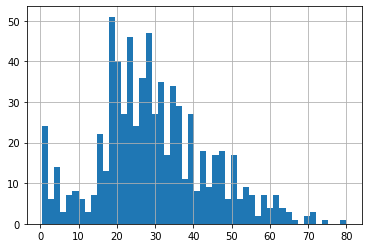

In [31]:
df.Age.hist(bins=50)

In [32]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406094

In [33]:
#it gives all the data present after 3 standard deviation (X + 3 sd)

c:\users\dell\firstproject\titanic _ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

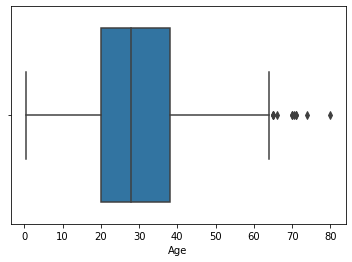

In [34]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [35]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_of_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [36]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [37]:
df.head(10)

,Age,Fare,Cabin,Age_end_of_distribution
0,22.0,7.2500,NaN,22.00000
1,38.0,71.2833,C85,38.00000
2,26.0,7.9250,NaN,26.00000
3,35.0,53.1000,C123,35.00000
4,35.0,8.0500,NaN,35.00000
5,28.0,8.4583,NaN,73.27861
6,54.0,51.8625,E46,54.00000
7,2.0,21.0750,NaN,2.00000
8,27.0,11.1333,NaN,27.00000
9,14.0,30.0708,NaN,14.00000


<AxesSubplot:>

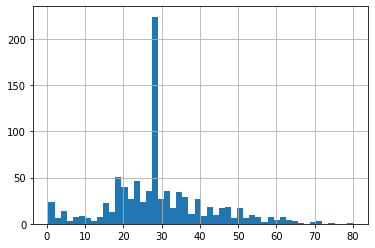

In [38]:
df['Age'].hist(bins=50)

<AxesSubplot:>

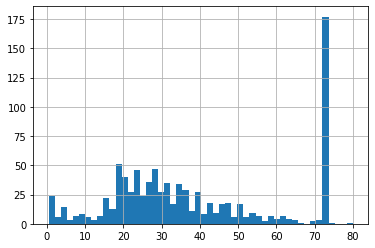

In [39]:
df['Age_end_of_distribution'].hist(bins=50)

c:\users\dell\firstproject\titanic _ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_of_distribution'>

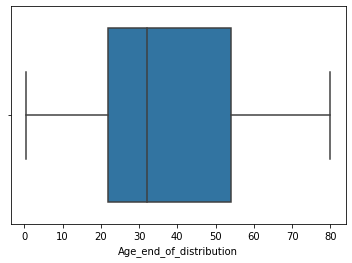

In [40]:
sns.boxplot('Age_end_of_distribution',data=df)

If there is suspicious that the missing value is not at random then this is used to replace the missing value with the value that are end of distribution

# Arbitrary imputation

In [43]:
df=pd.read_csv('train.csv',usecols=['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [53]:
df['Age'].mode()[0]

24.0

In [59]:
def impute_nan(df,variable):
    df[variable+'_hundred']=df[variable].fillna(100)

In [60]:
impute_nan(df,'Age')
df.head()

,Survived,Age,Fare,Age_hundred
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [61]:
df[df['Age'].isnull()]

,Survived,Age,Fare,Age_hundred
5,0,NaN,8.4583,100.0
17,1,NaN,13.0000,100.0
19,1,NaN,7.2250,100.0
26,0,NaN,7.2250,100.0
28,1,NaN,7.8792,100.0
...,...,...,...,...
859,0,NaN,7.2292,100.0
863,0,NaN,69.5500,100.0
868,0,NaN,9.5000,100.0
878,0,NaN,7.8958,100.0


<AxesSubplot:>

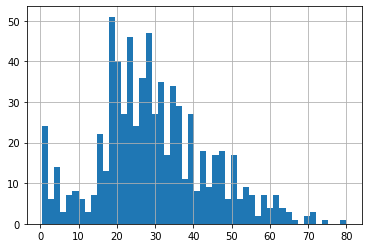

In [62]:
df['Age'].hist(bins=50)

In [63]:
#Arbitary value can be any value but mostly it should be more frequent present

# Frequent Category imputation

In [64]:
#similar to mode example

In [65]:
def impute_nan(df,variable):
    df[variable].fillna(df[variable].mode()[0],inplace=True)

In [71]:
impute_nan(df,'Age')
df[df['Age'].isnull()]

,Survived,Age,Fare,Age_hundred


In [72]:
#no null values